In [51]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture



# Data Loading

In [52]:

data = pd.read_csv('data/train.csv',index_col=0)

# Data Preparation

In [53]:


numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data_num = data[numerical_cols]


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)


In [54]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)


pca.fit(data_scaled)


transformed_data = pca.transform(data_scaled)




In [55]:
data_scaled=transformed_data

# K-Means Clustering

In [56]:
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [57]:
def metrics_plots(X,max_k=10):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(X)
        # Calculate cluster validation metrics and append to lists of metrics
        score.append(kmeans.score(X))
        score_kmeans_s.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(X, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(X, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    # Elbow Method plot
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

/Users/glebbadejko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/glebbadejko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/glebbadejko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/glebbadejko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

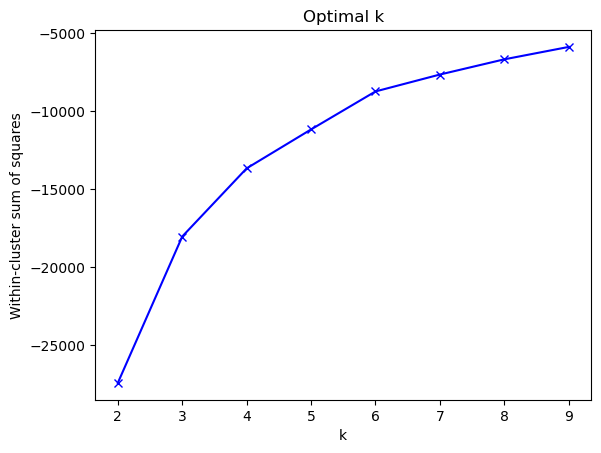

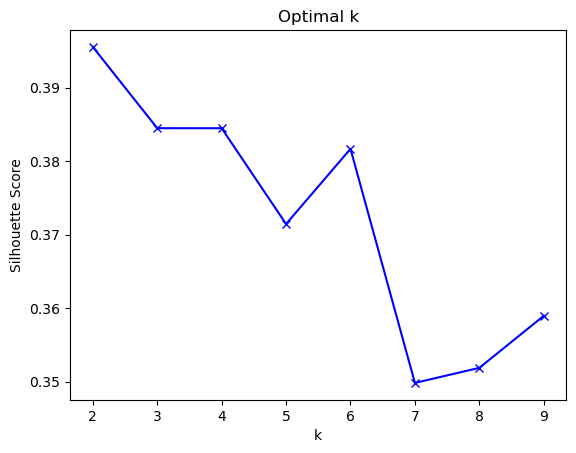

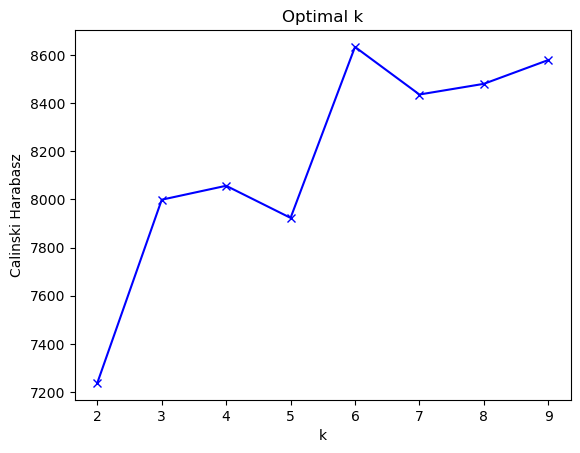

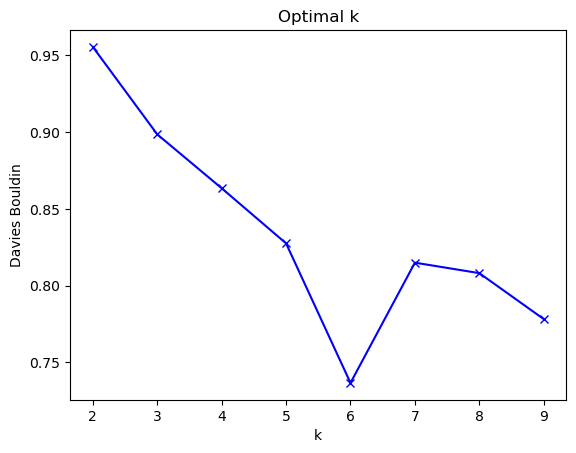

In [58]:
metrics_plots(data_scaled,max_k=10)

In [59]:


kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)


data['Cluster_KMeans'] = clusters_kmeans


/Users/glebbadejko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
silhouette_avg = silhouette_score(data_scaled, clusters_kmeans)
davies_bouldin_avg = davies_bouldin_score(data_scaled, clusters_kmeans)
print(f"KMeans Silhouette Score: {silhouette_avg}")
print(f"KMeans Davies-Bouldin Score: {davies_bouldin_avg}")

KMeans Silhouette Score: 0.38415112592282
KMeans Davies-Bouldin Score: 0.898742299910576


# Hierarchical Clustering

In [61]:


hierarchical = AgglomerativeClustering(n_clusters=3)
clusters_hierarchical = hierarchical.fit_predict(data_scaled)

data['Cluster_Hierarchical'] = clusters_hierarchical


# DBSCAN Clustering

First of all let's find the correct hyperparameters

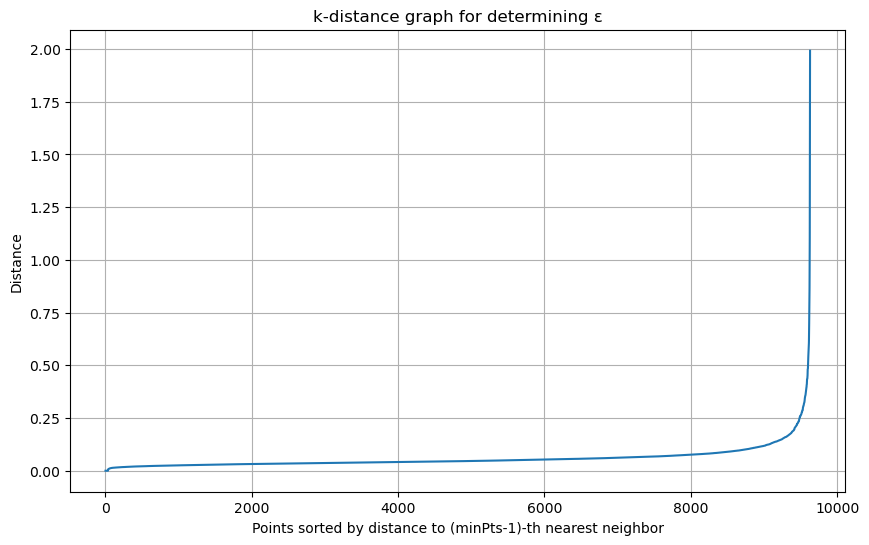

In [62]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


n_dimensions = data_scaled.shape[1]
minPts = 2 * n_dimensions


nbrs = NearestNeighbors(n_neighbors=minPts).fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)


k_distance = distances[:, minPts-1]


k_distance_sorted = np.sort(k_distance)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(k_distance_sorted) + 1), k_distance_sorted)
plt.xlabel('Points sorted by distance to (minPts-1)-th nearest neighbor')
plt.ylabel('Distance')
plt.title('k-distance graph for determining ε')
plt.grid(True)
plt.show()

In [63]:


dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(data_scaled)


data['Cluster_DBSCAN'] = clusters_dbscan


# Gaussian Mixture Models (GMM) Clustering

In [64]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

data_scaled['GMM_Clustering'] = gmm_labels


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Evaluation

In [ ]:
def evaluate_clustering(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    return silhouette_avg, davies_bouldin, calinski_harabasz

In [ ]:
kmeans_scores = evaluate_clustering(data_scaled, clusters_kmeans)
hierarchical_scores = evaluate_clustering(data_scaled, clusters_hierarchical)
dbscan_scores = evaluate_clustering(data_scaled[clusters_dbscan != -1], clusters_dbscan[clusters_dbscan != -1])
gmm_scores = evaluate_clustering(data_scaled, gmm_labels)

evaluation_results = pd.DataFrame({
    'Clustering Algorithm': ['K-Means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'Silhouette Score': [kmeans_scores[0], hierarchical_scores[0], dbscan_scores[0], gmm_scores[0]],
    'Davies-Bouldin Index': [kmeans_scores[1], hierarchical_scores[1], dbscan_scores[1], gmm_scores[1]],
    'Calinski-Harabasz Score': [kmeans_scores[2], hierarchical_scores[2], dbscan_scores[2], gmm_scores[2]]
})

evaluation_results

,Clustering Algorithm,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Score
0,K-Means,0.371211,0.827127,7918.104227
1,Hierarchical,0.355182,0.925496,7287.322905
2,DBSCAN,0.319940,0.427166,288.059055
3,GMM,0.366760,1.102945,5409.322527


# Cluster Visualization

In [ ]:


sns.pairplot(data_scaled, hue='GMM_Clustering', vars=numerical_cols[:2])
plt.show()


TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>